In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

np.set_printoptions(suppress=True, precision=5)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# os.chdir('Desktop/Coursera/Machine learning certificate/Classification/Project')


data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00000,0,1,Yes,Private,Urban,228.69000,36.60000,formerly smoked,1
1,51676,Female,61.00000,0,0,Yes,Self-employed,Rural,202.21000,NaN,never smoked,1
2,31112,Male,80.00000,0,1,Yes,Private,Rural,105.92000,32.50000,never smoked,1
3,60182,Female,49.00000,0,0,Yes,Private,Urban,171.23000,34.40000,smokes,1
4,1665,Female,79.00000,1,0,Yes,Self-employed,Rural,174.12000,24.00000,never smoked,1


In [4]:
data = data.drop(columns=['id'])
target = data['stroke']
data = data[data.columns[:-1]]

In [5]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.00000,0,1,Yes,Private,Urban,228.69000,36.60000,formerly smoked
1,Female,61.00000,0,0,Yes,Self-employed,Rural,202.21000,NaN,never smoked
2,Male,80.00000,0,1,Yes,Private,Rural,105.92000,32.50000,never smoked
3,Female,49.00000,0,0,Yes,Private,Urban,171.23000,34.40000,smokes
4,Female,79.00000,1,0,Yes,Self-employed,Rural,174.12000,24.00000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.00000,1,0,Yes,Private,Urban,83.75000,NaN,never smoked
5106,Female,81.00000,0,0,Yes,Self-employed,Urban,125.20000,40.00000,never smoked
5107,Female,35.00000,0,0,Yes,Self-employed,Rural,82.99000,30.60000,never smoked
5108,Male,51.00000,0,0,Yes,Private,Rural,166.29000,25.60000,formerly smoked


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [7]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
(data['gender'] == 'Other').sum()

1

In [10]:
data = data[data.gender != 'Other']

In [11]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Feature', 'Unique Values']).set_index('Feature')
df_uniques

,Unique Values
Feature,
gender,2
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3978
bmi,419


In [12]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

In [13]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['work_type', 'smoking_status']

In [14]:
print([[i, list(data[i].unique())] for i in categorical_variables])

[['work_type', ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']], ['smoking_status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown']]]


In [15]:
data = data[data.smoking_status != 'Unknown']
data.shape

(3565, 10)

In [16]:
numeric_variables = list(set(data.columns) - set(categorical_variables) - set(binary_variables))
numeric_variables

['avg_glucose_level', 'bmi', 'age']

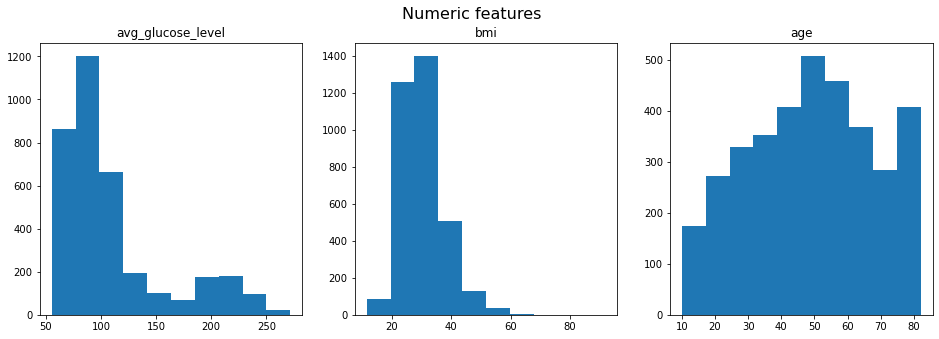

In [33]:
fig, axs = plt.subplots(1,3, figsize=(16,5))

axlist = axs.flatten()

for ax, feature in zip(axlist, numeric_variables):
    ax.hist(data[feature])
    ax.set_title(feature)
    
fig.suptitle('Numeric features', fontsize=16)
plt.show()

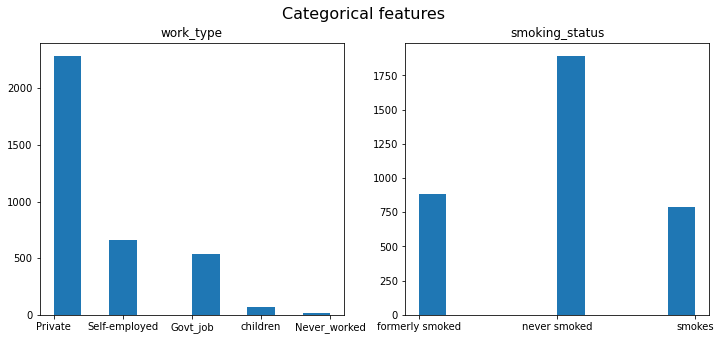

In [34]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

axlist = axs.flatten()

for ax, feature in zip(axlist, categorical_variables):
    ax.hist(data[feature])
    ax.set_title(feature)
    
fig.suptitle('Categorical features', fontsize=16)
plt.show()

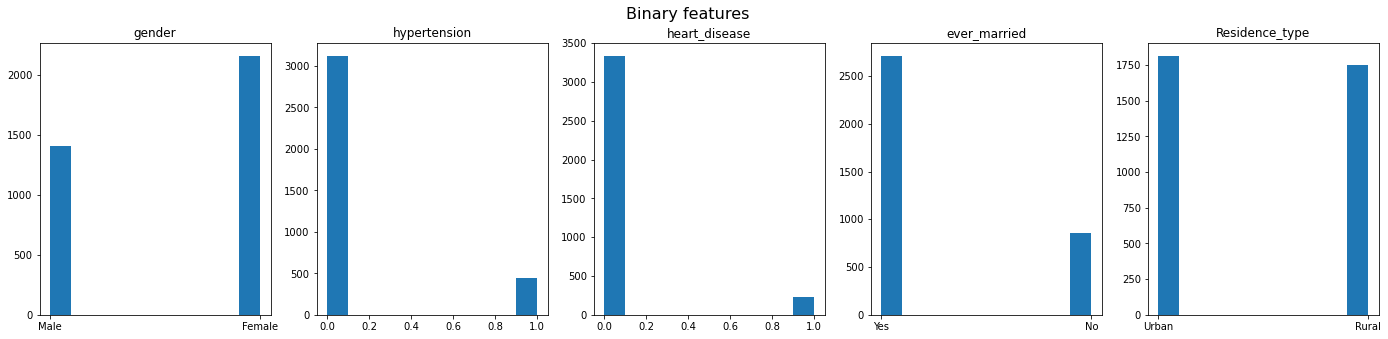

In [43]:
fig, axs = plt.subplots(1,5, figsize=(24,5))

axlist = axs.flatten()

for ax, feature in zip(axlist, binary_variables):
    ax.hist(data[feature])
    ax.set_title(feature)
    
fig.suptitle('Binary features', fontsize=16)
plt.show()

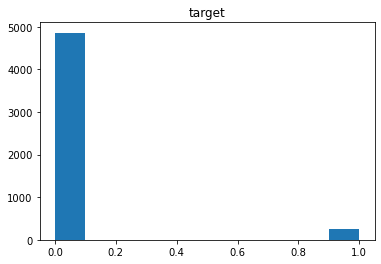

In [20]:
plt.hist(target)
plt.title('target')
plt.show()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

In [22]:
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                            ('normalizer', PowerTransformer(method='box-cox', standardize=True))
                           ])

cat_transformer = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))])

col_transformer = ColumnTransformer([('num_processing', num_transformer, numeric_variables),
                                     ('cat_processing', cat_transformer, (categorical_variables+binary_variables))])

In [23]:
test_data_trans = col_transformer.fit_transform(data)

In [37]:
transformed_cat_cols = col_transformer.named_transformers_['cat_processing'][0].get_feature_names_out(categorical_variables+binary_variables)

In [38]:
test_dataframe_trans = pd.DataFrame(test_data_trans, columns=[numeric_variables+transformed_cat_cols.tolist()])
test_dataframe_trans.head()

,avg_glucose_level,bmi,age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,Residence_type_Urban
0,1.77493,0.97472,0.95832,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000
1,1.61510,-0.01634,0.65189,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.33927,0.47175,1.61274,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000
3,1.36392,0.71504,0.02911,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
4,1.39121,-0.91672,1.56282,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000


In [41]:
test_dataframe_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (avg_glucose_level,)            3565 non-null   float64
 1   (bmi,)                          3565 non-null   float64
 2   (age,)                          3565 non-null   float64
 3   (work_type_Never_worked,)       3565 non-null   float64
 4   (work_type_Private,)            3565 non-null   float64
 5   (work_type_Self-employed,)      3565 non-null   float64
 6   (work_type_children,)           3565 non-null   float64
 7   (smoking_status_never smoked,)  3565 non-null   float64
 8   (smoking_status_smokes,)        3565 non-null   float64
 9   (gender_Male,)                  3565 non-null   float64
 10  (hypertension_1,)               3565 non-null   float64
 11  (heart_disease_1,)              3565 non-null   float64
 12  (ever_married_Yes,)             35

None

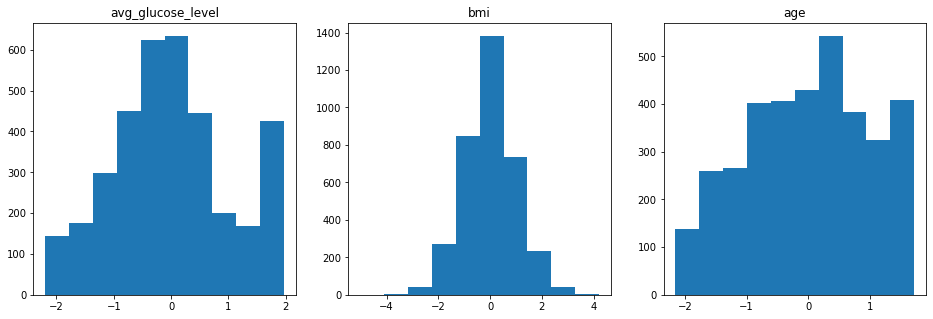

In [42]:
fig, axs = plt.subplots(1,3, figsize=(16,5))

axlist = axs.flatten()

for ax, feature in zip(axlist, numeric_variables):
    ax.hist(test_dataframe_trans[feature])
    ax.set_title(feature)